
 # Bone Marrow Changes in Lumbar Vertebrae with ConvNeXtXLarge & Machine Learning 

In this project, the ConvNeXt-XLarge architecture was employed for feature extraction. Various classification algorithms, including K-Nearest Neighbors (KNN),Support Vector Machine (SVM),  Decision Tree (DT), Random Forest (RF), Multi-Layer Perceptron (MLP), Histogram-Based Gradient Boosting (HGB), AdaBoost (AdaB), Passive Aggressive (PA), and Logistic Regression (LG), were utilized to evaluate classification performance.

The primary objective of this study is to develop a deep learning-based model capable of accurately distinguishing Normal and Abnormal MRI scans of the lumbar vertebrae, specifically identifying Bone Marrow Changes in Lumbar Vertebrae (BMCLVB). The model is trained on a labeled dataset, enabling it to recognize distinct patterns and features linked to these changes.

To enhance classification accuracy, the dataset was categorized into two broad groups—Normal and Abnormal—based on the affected regions. Additionally, each class was further subdivided into more specific categories. The project also explores the integration of transfer learning to improve the classification performance of BMCLVB, leveraging pre-trained deep learning models for better feature extraction and generalization.


*Yasir Hussein Shakir* 

*Ph.D. Candidate, Department of Engineering*

*Universiti Tenaga Nasional (UNITEN), Malaysia*

*Email: yasserhesseinshakir@yahoo.com*


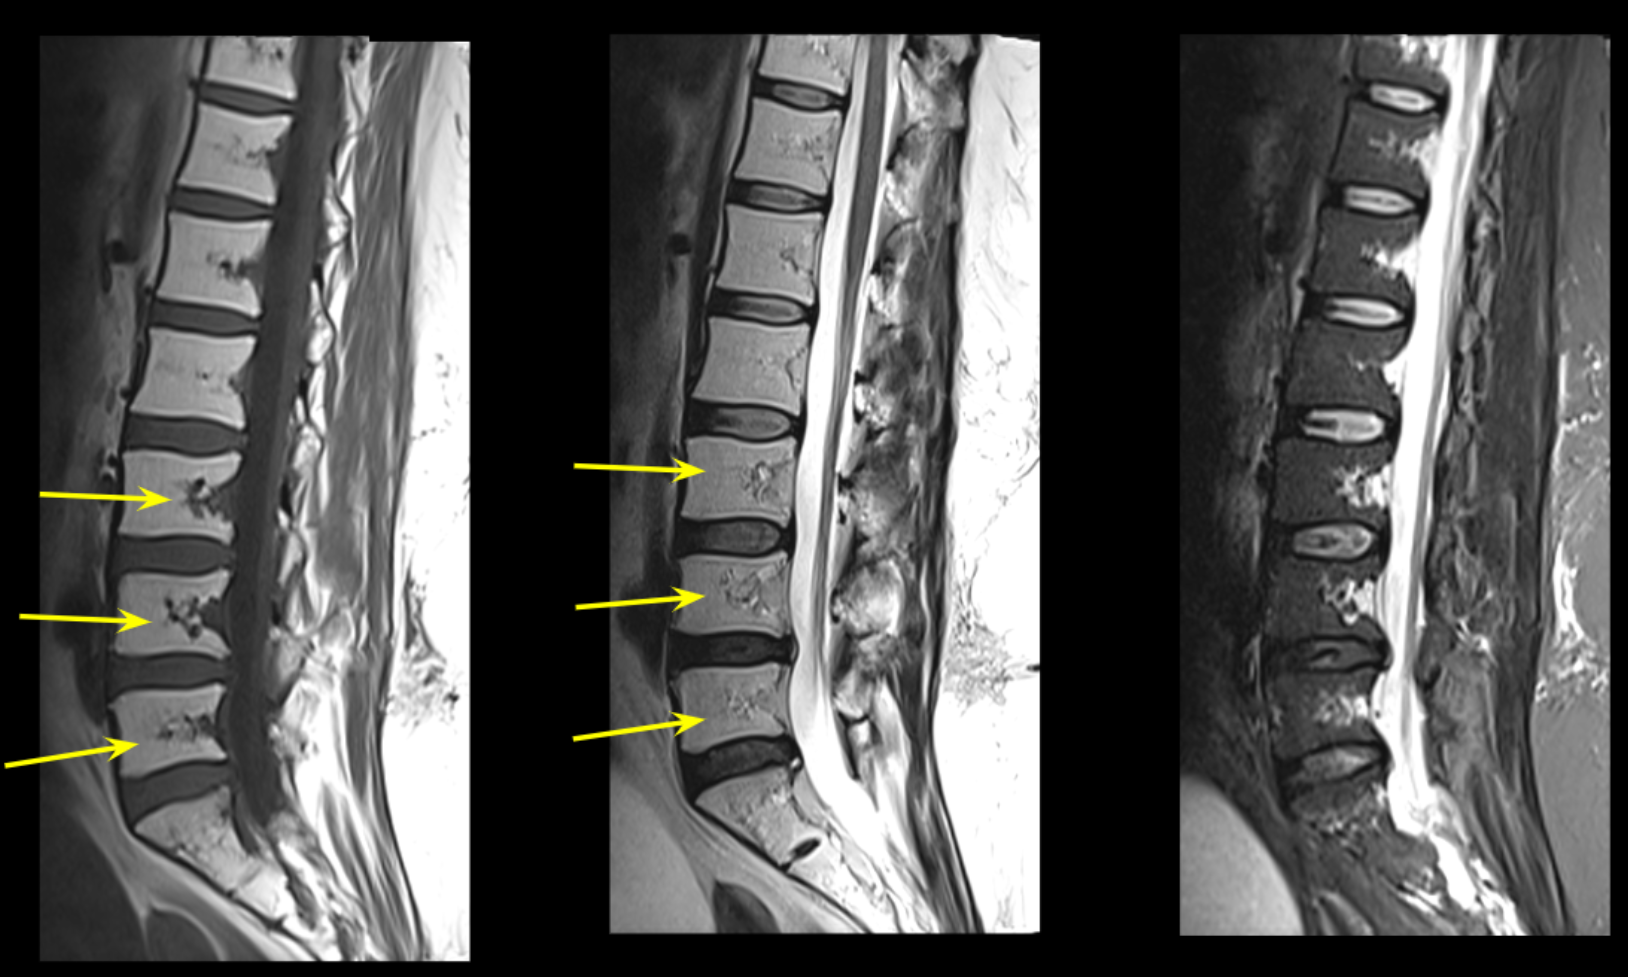

In [ ]:
import os
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 
from tensorflow.keras.applications import ConvNeXtTiny
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [1]:
# Paths to the directories
normal_dir = '/kaggle/input/bone-without/bone/Normal'
abnormal_dir = '/kaggle/input/bone-without/bone/Abnormal'

# Parameters
image_size = (224, 224)
batch_size = 32

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load images and labels
def load_dataset(normal_dir, abnormal_dir):
    images = []
    labels = []

    # Load normal images
    for img_name in os.listdir(normal_dir):
        img_path = os.path.join(normal_dir, img_name)
        img_array = load_and_preprocess_image(img_path)
        images.append(img_array)
        labels.append(0)

    # Load abnormal images
    for img_name in os.listdir(abnormal_dir):
        img_path = os.path.join(abnormal_dir, img_name)
        img_array = load_and_preprocess_image(img_path)
        images.append(img_array)
        labels.append(1)

    images = np.vstack(images)
    labels = np.array(labels)

    return images, labels

# Load dataset
images, labels = load_dataset(normal_dir, abnormal_dir)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load ConvNeXtXLarge model pre-trained on ImageNet, excluding the top fully-connected layers
ConvNeXtXLarge_model = keras.applications.ConvNeXtXLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
 #keras.applications.ConvNeXtXLarge
# Extract features
def extract_features(model, data):
    features = model.predict(data, batch_size=batch_size)
    features = features.reshape(features.shape[0], -1)  # Flatten the features
    return features

# Extract features from train and test sets
X_train_features = extract_features(ConvNeXtXLarge_model, X_train)
    X_test_features = extract_features(ConvNeXtXLarge_model, X_test)

2024-06-20 10:22:05.243840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 10:22:05.243937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 10:22:05.504456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1393257616/1393257616 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
 1/26 ━━━━━━━━━━━━━━━━━━━━ 8:42 21s/step

I0000 00:00:1718879001.616154      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718879001.645649      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879001.646134      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879001.646600      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879001.647048      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879001.647464      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879001.647883      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879001.648296      71 graph_launch.cc:671] Fallback to op-by-op mode because m

26/26 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step


W0000 00:00:1718879038.174639      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879038.175162      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718879038.175696      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


In [2]:
ConvNeXtXLarge_model.summary()

Model: "convnext_xlarge"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_pr… │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │     13,056 │ convnext_xlarge_… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │     12,800 │ convnext_xlarge_… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │        512 │ convnext_xlarge_… │
│ (LayerNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │    263,168 │ convnext_xlarge_… │
│ (Dense)             │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │          0 │ convnext_xlarge_… │
│ (Activation)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │    262,400 │ convnext_xlarge_… │
│ (Dense)             │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │        256 │ convnext_xlarge_… │
│ (LayerScale)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │          0 │ convnext_xlarge_… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ convnext_xlarge_… │
│                     │ 256)              │            │ convnext_xlarge_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │     12,800 │ add[0][0]         │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │        512 │ convnext_xlarge_… │
│ (LayerNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │    263,168 │ convnext_xlarge_… │
│ (Dense)             │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │          0 │ convnext_xlarge_… │
│ (Activation)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │    262,400 │ convnext_xlarge_… │
│ (Dense)             │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_xlarge_st… │ (None, 56, 56,    │        256 │ convnext_xlarge_

 Total params: 348,147,968 (1.30 GB)

 Trainable params: 348,147,968 (1.30 GB)

 Non-trainable params: 0 (0.00 B)

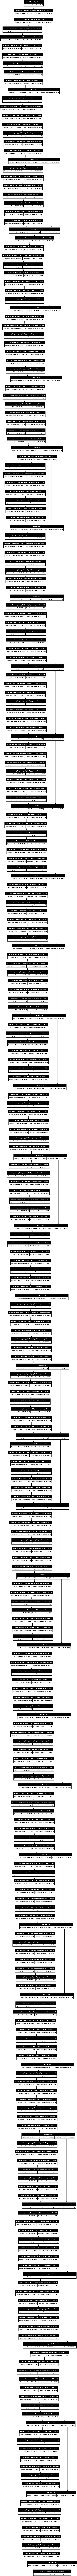

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(ConvNeXtXLarge_model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [5]:
# Train KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = knn_classifier.predict(X_test_features)

# Evaluate the classifier
knnaccuracy = accuracy_score(y_test, y_pred)
knnprecision = precision_score(y_test, y_pred)
knnrecall = recall_score(y_test, y_pred)
knnf1 = f1_score(y_test, y_pred)
knnconf_matrix = confusion_matrix(y_test, y_pred)
knnclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {knnaccuracy:.4f}')
print(f'Precision: {knnprecision:.4f}')
print(f'Recall: {knnrecall:.4f}')
print(f'F1 Score: {knnf1:.4f}')
print('Confusion Matrix:')
print(knnconf_matrix)
print('Classification Report:')
print(knnclass_report)

Accuracy: 0.8382
Precision: 0.8609
Recall: 0.8534
F1 Score: 0.8571
Confusion Matrix:
[[72 16]
 [17 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        88
           1       0.86      0.85      0.86       116

    accuracy                           0.84       204
   macro avg       0.83      0.84      0.84       204
weighted avg       0.84      0.84      0.84       204



In [6]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = svm_classifier.predict(X_test_features)

# Evaluate the classifier
svmaccuracy = accuracy_score(y_test, y_pred)
svmprecision = precision_score(y_test, y_pred)
svmrecall = recall_score(y_test, y_pred)
svmf1 = f1_score(y_test, y_pred)
svmconf_matrix = confusion_matrix(y_test, y_pred)
svmclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {svmaccuracy:.4f}')
print(f'Precision: {svmprecision:.4f}')
print(f'Recall: {svmrecall:.4f}')
print(f'F1 Score: {svmf1:.4f}')
print('Confusion Matrix:')
print(svmconf_matrix)
print('Classification Report:')
print(svmclass_report)

Accuracy: 0.9265
Precision: 0.9244
Recall: 0.9483
F1 Score: 0.9362
Confusion Matrix:
[[ 79   9]
 [  6 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        88
           1       0.92      0.95      0.94       116

    accuracy                           0.93       204
   macro avg       0.93      0.92      0.92       204
weighted avg       0.93      0.93      0.93       204



In [7]:
# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = dt_classifier.predict(X_test_features)

# Evaluate the classifier
DTaccuracy = accuracy_score(y_test, y_pred)
DTprecision = precision_score(y_test, y_pred)
DTrecall = recall_score(y_test, y_pred)
DTf1 = f1_score(y_test, y_pred)
DTconf_matrix = confusion_matrix(y_test, y_pred)
DTclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {DTaccuracy:.4f}')
print(f'Precision: {DTprecision:.4f}')
print(f'Recall: {DTrecall:.4f}')
print(f'F1 Score: {DTf1:.4f}')
print('Confusion Matrix:')
print(DTconf_matrix)
print('Classification Report:')
print(DTclass_report)

Accuracy: 0.7353
Precision: 0.7672
Recall: 0.7672
F1 Score: 0.7672
Confusion Matrix:
[[61 27]
 [27 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        88
           1       0.77      0.77      0.77       116

    accuracy                           0.74       204
   macro avg       0.73      0.73      0.73       204
weighted avg       0.74      0.74      0.74       204



In [8]:
# Train MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = mlp_classifier.predict(X_test_features)

# Evaluate the classifier
mlpaccuracy = accuracy_score(y_test, y_pred)
mlpprecision = precision_score(y_test, y_pred)
mlprecall = recall_score(y_test, y_pred)
mlpf1 = f1_score(y_test, y_pred)
mlpconf_matrix = confusion_matrix(y_test, y_pred)
mlpclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {mlpaccuracy:.4f}')
print(f'Precision: {mlpprecision:.4f}')
print(f'Recall: {mlprecall:.4f}')
print(f'F1 Score: {mlpf1:.4f}')
print('Confusion Matrix:')
print(mlpconf_matrix)
print('Classification Report:')
print(mlpclass_report)

Accuracy: 0.9069
Precision: 0.8943
Recall: 0.9483
F1 Score: 0.9205
Confusion Matrix:
[[ 75  13]
 [  6 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        88
           1       0.89      0.95      0.92       116

    accuracy                           0.91       204
   macro avg       0.91      0.90      0.90       204
weighted avg       0.91      0.91      0.91       204



In [9]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test_features)

# Evaluate the classifier
RFaccuracy = accuracy_score(y_test, y_pred)
RFprecision = precision_score(y_test, y_pred)
RFrecall = recall_score(y_test, y_pred)
RFf1 = f1_score(y_test, y_pred)
RFconf_matrix = confusion_matrix(y_test, y_pred)
RFclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {RFaccuracy:.4f}')
print(f'Precision: {RFprecision:.4f}')
print(f'Recall: {RFrecall:.4f}')
print(f'F1 Score: {RFf1:.4f}')
print('Confusion Matrix:')
print(RFconf_matrix)
print('Classification Report:')
print(RFclass_report)

Accuracy: 0.8333
Precision: 0.8254
Recall: 0.8966
F1 Score: 0.8595
Confusion Matrix:
[[ 66  22]
 [ 12 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        88
           1       0.83      0.90      0.86       116

    accuracy                           0.83       204
   macro avg       0.84      0.82      0.83       204
weighted avg       0.83      0.83      0.83       204



In [10]:
# Train HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(random_state=42)
hgb_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = hgb_classifier.predict(X_test_features)

# Evaluate the classifier
hgbaccuracy = accuracy_score(y_test, y_pred)
hgbprecision = precision_score(y_test, y_pred)
hgbrecall = recall_score(y_test, y_pred)
hgbf1 = f1_score(y_test, y_pred)
hgbconf_matrix = confusion_matrix(y_test, y_pred)
hgbclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {hgbaccuracy:.4f}')
print(f'Precision: {hgbprecision:.4f}')
print(f'Recall: {hgbrecall:.4f}')
print(f'F1 Score: {hgbf1:.4f}')
print('Confusion Matrix:')
print(hgbconf_matrix)
print('Classification Report:')
print(hgbclass_report)

Accuracy: 0.9020
Precision: 0.9138
Recall: 0.9138
F1 Score: 0.9138
Confusion Matrix:
[[ 78  10]
 [ 10 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        88
           1       0.91      0.91      0.91       116

    accuracy                           0.90       204
   macro avg       0.90      0.90      0.90       204
weighted avg       0.90      0.90      0.90       204



In [11]:
# Train AdaBoost classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = ada_classifier.predict(X_test_features)

# Evaluate the classifier
adaaccuracy = accuracy_score(y_test, y_pred)
adaprecision = precision_score(y_test, y_pred)
adarecall = recall_score(y_test, y_pred)
adaf1 = f1_score(y_test, y_pred)
adaconf_matrix = confusion_matrix(y_test, y_pred)
adaclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {adaaccuracy:.4f}')
print(f'Precision: {adaprecision:.4f}')
print(f'Recall: {adarecall:.4f}')
print(f'F1 Score: {adaf1:.4f}')
print('Confusion Matrix:')
print(adaconf_matrix)
print('Classification Report:')
print(adaclass_report)

Accuracy: 0.7696
Precision: 0.7899
Recall: 0.8103
F1 Score: 0.8000
Confusion Matrix:
[[63 25]
 [22 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        88
           1       0.79      0.81      0.80       116

    accuracy                           0.77       204
   macro avg       0.77      0.76      0.76       204
weighted avg       0.77      0.77      0.77       204



In [12]:
# Train PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(random_state=42)
pa_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = pa_classifier.predict(X_test_features)

# Evaluate the classifier
paaccuracy = accuracy_score(y_test, y_pred)
paprecision = precision_score(y_test, y_pred)
parecall = recall_score(y_test, y_pred)
paf1 = f1_score(y_test, y_pred)
paconf_matrix = confusion_matrix(y_test, y_pred)
paclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {paaccuracy:.4f}')
print(f'Precision: {paprecision:.4f}')
print(f'Recall: {parecall:.4f}')
print(f'F1 Score: {paf1:.4f}')
print('Confusion Matrix:')
print(paconf_matrix)
print('Classification Report:')
print(paclass_report)

Accuracy: 0.9167
Precision: 0.9231
Recall: 0.9310
F1 Score: 0.9270
Confusion Matrix:
[[ 79   9]
 [  8 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        88
           1       0.92      0.93      0.93       116

    accuracy                           0.92       204
   macro avg       0.92      0.91      0.91       204
weighted avg       0.92      0.92      0.92       204



In [13]:
# Train Logistic Regression classifier
lg_classifier = LogisticRegression(random_state=42)#max_iter=100,
lg_classifier.fit(X_train_features, y_train)

# Predict on test set
y_pred = lg_classifier.predict(X_test_features)

# Evaluate the classifier
lgaccuracy = accuracy_score(y_test, y_pred)
lgprecision = precision_score(y_test, y_pred)
lgrecall = recall_score(y_test, y_pred)
lgf1 = f1_score(y_test, y_pred)
lgconf_matrix = confusion_matrix(y_test, y_pred)
lgclass_report = classification_report(y_test, y_pred)

print(f'Accuracy: {lgaccuracy:.4f}')
print(f'Precision: {lgprecision:.4f}')
print(f'Recall: {lgrecall:.4f}')
print(f'F1 Score: {lgf1:.4f}')
print('Confusion Matrix:')
print(lgconf_matrix)
print('Classification Report:')
print(lgclass_report)

Accuracy: 0.9314
Precision: 0.9322
Recall: 0.9483
F1 Score: 0.9402
Confusion Matrix:
[[ 80   8]
 [  6 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        88
           1       0.93      0.95      0.94       116

    accuracy                           0.93       204
   macro avg       0.93      0.93      0.93       204
weighted avg       0.93      0.93      0.93       204



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


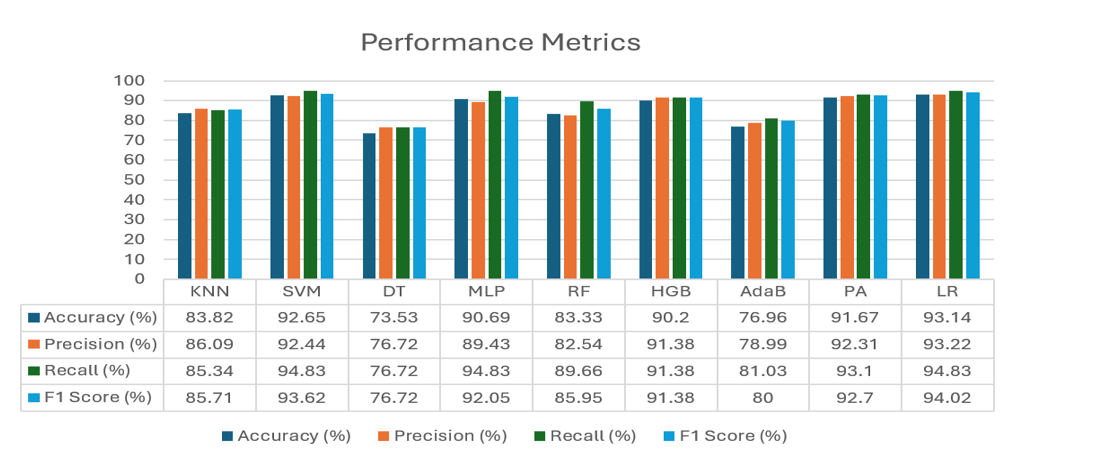

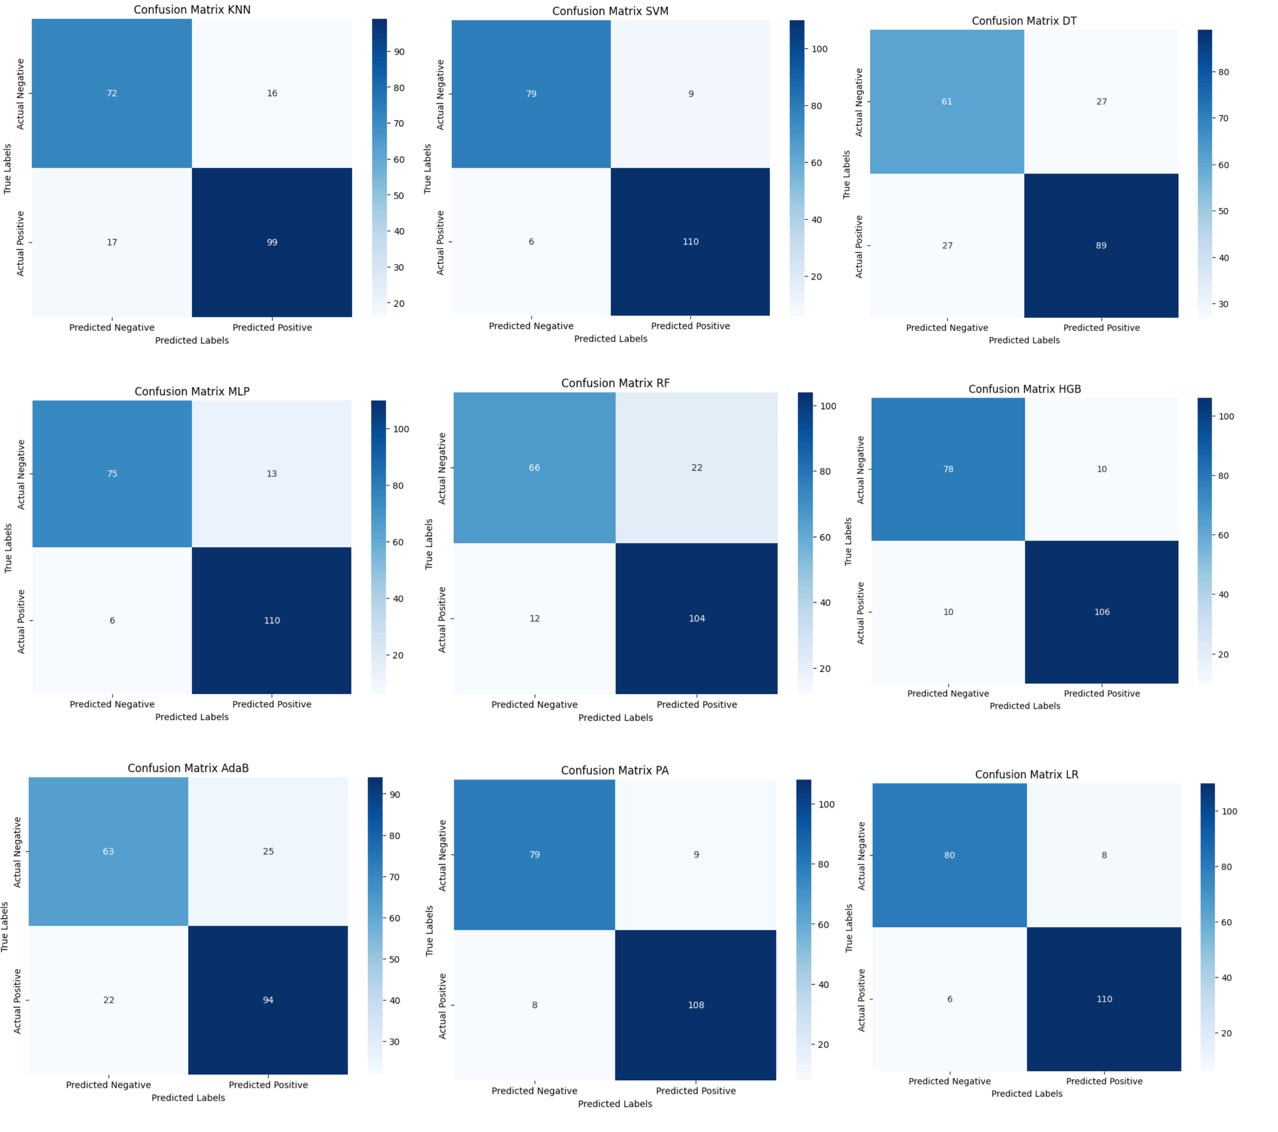